Create a data set for three classes and train them for classification.  We want to have two classes with high accuracy and one with low accuracy. So, we will select samples for one class from a population with high variance.

In [1]:
# import libraries
#import torch
import numpy as np
from numpy import random

from sklearn.neural_network import MLPClassifier
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# create data

np.full((10, 3), [0, 1, 2])


array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [15]:
# Create features
import random

x0 = np.random.normal(5, 3, size=(100, 10))
# Select x1 from a population of 500 samples with high variance
# Create a population
population = np.random.normal(15, 16, size=(500, 10)).tolist()   # set high variance to get low accuracy
print("shape of population", np.shape(population))
random_index = random.randint(0, len(population))

#x1 = population.pop(random.randint(0, len(population)-1))

#transpose = [[row[i] for row in matrix] for i in range(2)]

# Select 30 samples from the population randomly
x1 = np.array([population.pop(random.randint(0, len(population)-1)) for i in range(30)])


#random_indices = np.random.randint(0, len(population), size=2)
#x1 = np.delete(population, random_indices, axis=0)
#x1 = np.array([np.delete(population, np.random.randint(0, len(population), size=2), 0) for i in range(2)], dtype=object)
#x1 = population.tolist().pop(random_index)
#x1 = population.pop(np.random.randint(0, len(population))
#x1 = [population.pop(np.random.randint(0, len(population)) for i in range(2)]
#x1 = np.random.choice(population, size=(2, 10), replace=False)
x2 = np.random.normal(25, 3, size=(100, 10))

print(' x0 {}: \n  {} \n ... \n x1 {}: \n  {} \n ... \n x2 {}: \n  {} \n ...'.format(x0.shape, x0[:3], x1.shape, x1[:3], x2.shape, x2[:3]))
print("shape of population", np.shape(population))
# print('Epoch: {} \tTraining Loss: {:.6f}'.format(
#         epoch+1, 
#         train_loss 
#         ))

shape of population (500, 10)
 x0 (100, 10): 
  [[ 9.66299309  5.79324824  5.67784739 -1.15205803  5.79976866  7.37593808
   3.40687511  0.58300364  5.73553326  6.14315092]
 [ 5.1695759   2.80561997 -0.3470688   4.97157826  2.26030481  5.90045358
   1.16246824  6.44732754  7.54140032  4.25860314]
 [ 4.07605107  1.41736442  4.85318816 -2.71658574  1.72445909  5.54329547
   0.46394518  4.27159972 -0.26572982  6.3550189 ]] 
 ... 
 x1 (30, 10): 
  [[31.29713245  5.90700109 17.84710561 23.20066152 40.90172551 24.79004325
  16.78483243 25.49300361  3.77784891 -9.83195158]
 [22.54757005 -2.1058458  27.1719197  36.22330179 23.70928405 22.73804961
  26.08066563 14.19220641 39.61285041 46.81849439]
 [13.79253547 32.0923612  15.26567417  8.90263791 33.63525113 25.68444034
  15.12271289  7.08212581 11.14814285 34.48015779]] 
 ... 
 x2 (100, 10): 
  [[20.97635742 24.1247207  24.02413528 20.16909208 25.17963386 25.07430475
  23.4780404  22.94848314 25.37488755 20.50817496]
 [17.08250073 25.96380059 

In [16]:
# Join features
X = np.concatenate((x0, x1, x2), axis=0)
print(" X[1]: \n  {} \n X[100]: \n  {} \n X[200]: \n  {} \n".format(X[1], X[100], X[200]))
X.shape

 X[1]: 
  [ 5.1695759   2.80561997 -0.3470688   4.97157826  2.26030481  5.90045358
  1.16246824  6.44732754  7.54140032  4.25860314] 
 X[100]: 
  [31.29713245  5.90700109 17.84710561 23.20066152 40.90172551 24.79004325
 16.78483243 25.49300361  3.77784891 -9.83195158] 
 X[200]: 
  [26.42447377 24.97680363 27.29926724 30.06272211 25.32072549 28.51702219
 25.20866436 18.81874699 24.68313352 25.25879103] 



(230, 10)

In [19]:
# Create labels
y0 = np.zeros(100, dtype=int)
y1 = np.ones(30, dtype=int)
#y2 = y1 * 2
y2 = np.full(100, 2, dtype=int)
y = np.concatenate((y0, y1, y2))
y.shape

(230,)

In [20]:
# Split the data

X = StandardScaler().fit_transform(X)
    # X_train, X_test, y_train, y_test = \
    #     train_test_split(X, y, test_size=.4, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [21]:
# Train the model
from sklearn import linear_model

clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)
# ... 
# SGDClassifier(alpha=0.0001, class_weight=None, epsilon=0.1, eta0=0.0,
#         fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
#         loss='hinge', n_iter=5, n_jobs=1, penalty='l2', power_t=0.5,
#         random_state=None, shuffle=False,
#         verbose=0, warm_start=False)
print(clf.predict([[4.04766425, 2.05826595, 3.53780513, 4.67943289, 4.31188736, 1.38496808, 1.85608032, 4.63458843, 1.75793121, 7.18017014]]))

[2]


In [22]:
# Evaluate metrics
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(y_pred)

[[25  0  0]
 [ 2  5  1]
 [ 0  0 25]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.62      0.77         8
           2       0.96      1.00      0.98        25

    accuracy                           0.95        58
   macro avg       0.96      0.88      0.90        58
weighted avg       0.95      0.95      0.94        58

[0 1 2 2 0 2 0 0 2 2 0 0 0 2 0 2 2 2 2 0 0 2 0 0 0 2 1 2 0 2 0 2 0 2 0 0 0
 1 0 0 2 2 0 2 2 0 0 1 2 0 0 0 2 2 1 2 2 2]


In [203]:
# Create and train a Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier

clf2 = MLPClassifier(random_state=1, max_iter=300, warm_start=True).fit(X_train, y_train)
print(clf2.predict_proba(X_test[:1]))
print(clf2.predict(X_test[:5, :]))
print(clf2.score(X_test, y_test))

y_pred2 = clf2.predict(X_test)

# Check other metrics
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))


[[9.96657225e-01 3.19009131e-03 1.52684023e-04]]
[0 1 2 2 0]
0.9482758620689655
[[25  0  0]
 [ 2  5  1]
 [ 0  0 25]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.62      0.77         8
           2       0.96      1.00      0.98        25

    accuracy                           0.95        58
   macro avg       0.96      0.88      0.90        58
weighted avg       0.95      0.95      0.94        58



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [206]:
len(population)  # see if we have enough samples remained

0

In [98]:
# Get 50 more samples from the population
X1 = np.array([population.pop(random.randint(0, len(population)-1)) for i in range(50)])
print(X1.shape)
X1 = np.concatenate((x0[:2], X1, x2[:2]), axis=0)
print(X1[:3])
# Y1 = np.ones(200, dtype=int)
# Y1 = np.concatenate((y0[:2], Y1, y2[:2]), axis=0)
# Y1

(50, 10)
[[ 9.66299309  5.79324824  5.67784739 -1.15205803  5.79976866  7.37593808
   3.40687511  0.58300364  5.73553326  6.14315092]
 [ 5.1695759   2.80561997 -0.3470688   4.97157826  2.26030481  5.90045358
   1.16246824  6.44732754  7.54140032  4.25860314]
 [ 6.21857683  2.84829733 12.46667732 14.2912174  10.88482442 28.99431137
  25.54244085 29.81734963 34.02421411 31.67500868]]


In [99]:
# Prepare relavent labels for the new features
Y1 = np.ones(50, dtype=int)
Y1 = np.concatenate((y0[:2], Y1, y2[:2]), axis=0)
Y1

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

In [100]:
# Split the data
X1 = StandardScaler().fit_transform(X1)    
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, stratify=Y1, random_state=1)

In [204]:
# Retrain the model with new samples

import statistics

# initilize scores before training
Score = clf2.score(X_test, y_test)
Scores = [Score]
avg = Score

while Score >= 0.9996*avg:
  clf2.partial_fit(X1_train, y1_train)
  Score = clf2.score(X_test, y_test)
  Scores.append(Score)
  avg = statistics.mean(Scores)

print("num of iterations: ", len(Scores)-1)
# for i in range(50):
  
#   #Score = clf2.score(X_test, y_test)
#   avg = statistics.mean(Scores)
#   less_avg = 0.99*avg

#   if Score >= less_avg:
#     clf2.partial_fit(X1_train, y1_train)
#     Score = clf2.score(X_test, y_test)
#     Scores.append(Score)
#     print("iterations: ", i)
#     print("mean: {}, score: {}".format(statistics.mean(Scores), Score))
#   else:
#     break
  

# Check again the evaluation metrics
y_pred2 = clf2.predict(X_test)

print(clf2.predict_proba(X_test[:1]))
print(clf2.predict(X_test[:5, :]))
print(clf2.score(X_test, y_test))

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

num of iterations:  24
[[9.02378781e-01 9.69204370e-02 7.00782415e-04]]
[0 1 2 2 0]
0.9827586206896551
[[25  0  0]
 [ 0  8  0]
 [ 0  1 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      1.00      0.94         8
           2       1.00      0.96      0.98        25

    accuracy                           0.98        58
   macro avg       0.96      0.99      0.97        58
weighted avg       0.98      0.98      0.98        58



iterations:  24


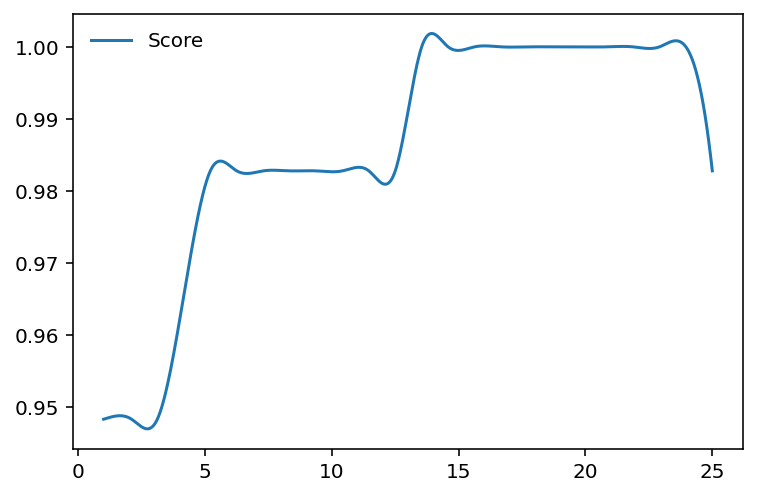

In [215]:
# Visualize accuracy according to the number of iterations
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

from scipy import interpolate

# x = np.linspace(0, 20, num=20)
# #y = np.cos(-x**2/9.0)
# f = interp1d(x, Scores)
# f2 = interp1d(x, Scores, kind='cubic')

# xnew = np.linspace(0, 20, num=1000)
# import matplotlib.pyplot as plt
# plt.plot(x, Scores, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
# plt.legend(['data', 'linear', 'cubic'], loc='best')

iterations = len(Scores) -1
print("iterations: ",iterations)

x = np.linspace(0, iterations+1, iterations+1)

x_new = np.linspace(1, iterations+1, 1000)
a_BSpline = interpolate.make_interp_spline(x, Scores)
y_new = a_BSpline(x_new)

plt.plot(x_new, y_new, label='Score')

# fig = plt.figure()
# plt.plot(x, Scores, '-', label='Score')
#plt.plot(x, np.cos(x), '--');

#plt.plot(Scores, label='Score')
plt.legend(frameon=False)

In [30]:
# Retrain the model with new samples
clf2.fit(X1_train, y1_train)

# Check again the evaluation metrics
y_pred2 = clf2.predict(X1_test)

print(clf2.predict_proba(X1_test[:1]))
print(confusion_matrix(y1_test, y_pred2))
print(classification_report(y1_test, y_pred2))

[[0.02744999 0.93468872 0.03786129]]
[[ 0  0  0]
 [ 6 38  6]
 [ 0  0  1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.76      0.86        50
           2       0.14      1.00      0.25         1

    accuracy                           0.76        51
   macro avg       0.38      0.59      0.37        51
weighted avg       0.98      0.76      0.85        51



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X, y = make_classification(n_samples=2, random_state=1)
X

array([[-0.93576943, -1.10051487, -0.87785842,  0.03868869,  0.04221375,
        -0.69166075, -0.01748335,  0.90159072, -1.236504  ,  1.14472371,
        -0.39675353, -0.26788808,  0.58281521, -0.12289023, -0.17242821,
         0.53035547,  0.90085595,  0.50249434, -1.10061918, -0.68372786],
       [ 1.6924546 ,  0.23476552, -0.84520564,  0.04116839, -0.67124613,
         0.19091548,  0.05086959,  1.65980218,  0.32639651,  0.2344157 ,
         2.10025514,  0.05080775, -0.0126646 , -0.74715829, -0.6871727 ,
        -0.63699565, -0.19183555,  0.74204416, -1.11731035, -0.88762896]])

In [ ]:
# Preprocess data and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
...                                                     random_state=1)
>>> clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
>>> clf.predict_proba(X_test[:1])
array([[0.038..., 0.961...]])
>>> clf.predict(X_test[:5, :])
array([1, 0, 1, 0, 1])
>>> clf.score(X_test, y_test)
0.8...

In [ ]:
from sklearn import linear_model
>>> X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
>>> Y = np.array([1, 1, 2, 2])
>>> clf = linear_model.SGDClassifier()
>>> clf.fit(X, Y)
... 
SGDClassifier(alpha=0.0001, class_weight=None, epsilon=0.1, eta0=0.0,
        fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
        loss='hinge', n_iter=5, n_jobs=1, penalty='l2', power_t=0.5,
        random_state=None, shuffle=False,
        verbose=0, warm_start=False)
>>> print(clf.predict([[-0.8, -1]]))